In [1]:
import pandas as pd, numpy as np, os
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
output_dir ='/ihme/costeffectiveness/results/vivarium_ciff_sam/v4.1_wasting_treatment/ciff_sam/2021_09_24_16_36_30/count_data/'

In [3]:
os.listdir(output_dir)

['wasting_transition_count.hdf',
 'wasting_transition_count.csv',
 'wasting_state_person_time.hdf',
 'deaths.csv',
 'wasting_state_person_time.csv',
 'deaths.hdf',
 'disease_transition_count.csv',
 'population.csv',
 'stunting_state_person_time.hdf',
 'ylds.csv',
 'ylls.csv',
 'disease_state_person_time.csv',
 'population.hdf',
 'ylls.hdf',
 'ylds.hdf',
 'disease_state_person_time.hdf',
 'disease_transition_count.hdf',
 'stunting_state_person_time.csv']

# verify person time does not vary across different observers 

In [35]:
cols = ['input_draw','sex','scenario','age']

wasting_pt = pd.read_csv(output_dir +'wasting_state_person_time.csv').groupby(cols).sum()[['value']]
stunting_pt = pd.read_csv(output_dir +'stunting_state_person_time.csv').groupby(cols).sum()[['value']]
disease_pt = pd.read_csv(output_dir +'disease_state_person_time.csv')
disease_pt['cause'] = disease_pt.cause.str.replace('susceptible_to_','')
disease_pt = disease_pt.groupby(cols+['cause']).sum()[['value']].reset_index()
disease_pt['value'] = disease_pt['value'].round(0)
stunting_pt['value'] = stunting_pt['value'].round(0)
wasting_pt['value'] = wasting_pt['value'].round(0)
disease_pt.head()

input_draw     sex  scenario              age  \
0          29  female  baseline       1-5_months   
1          29  female  baseline       1-5_months   
2          29  female  baseline       1-5_months   
3          29  female  baseline  12_to_23_months   
4          29  female  baseline  12_to_23_months   

                          cause     value  
0            diarrheal_diseases  219220.0  
1  lower_respiratory_infections  219220.0  
2                       measles  219220.0  
3            diarrheal_diseases  512829.0  
4  lower_respiratory_infections  512829.0

In [36]:
assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == disease_pt.loc[disease_pt.cause=='lower_respiratory_infections'].drop(columns='cause').set_index(cols))

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == disease_pt.loc[disease_pt.cause=='measles'].drop(columns='cause').set_index(cols))

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == wasting_pt)

assert np.all(disease_pt.loc[disease_pt.cause=='diarrheal_diseases'].drop(columns='cause').set_index(cols) 
        == stunting_pt)

In [37]:
wasting_pt.head()

value
input_draw sex    scenario age                       
29         female baseline 1-5_months        219220.0
                           12_to_23_months   512829.0
                           2_to_4           1510035.0
                           6-11_months       257628.0
                           early_neonatal     10083.0

# Annual incident cases of wasting

In [38]:
wasting_transitions = pd.read_csv(output_dir + 'wasting_transition_count.csv').drop(columns='Unnamed: 0')
wasting_transitions = wasting_transitions.loc[wasting_transitions.age.isin(['6-11_months',
       '12_to_23_months', '2_to_4'])]
wasting_transitions = wasting_transitions.groupby(['input_draw','scenario','measure']).sum().drop(columns='year')
pt = wasting_pt.reset_index().loc[wasting_pt.reset_index().age.isin(['6-11_months',
       '12_to_23_months', '2_to_4'])].groupby(['input_draw','scenario']).sum()
wasting_incidence = wasting_transitions / pt #* 100_000
wasting_incidence = wasting_incidence.groupby(['scenario','measure']).describe(percentiles=[0.025,0.975])
wasting_incidence

value  \
                                                                     count   
scenario          measure                                                    
baseline          mild_child_wasting_to_moderate_acute_malnutriti...  12.0   
                  mild_child_wasting_to_susceptible_to_child_wast...  12.0   
                  moderate_acute_malnutrition_to_mild_child_wasti...  12.0   
                  moderate_acute_malnutrition_to_severe_acute_mal...  12.0   
                  severe_acute_malnutrition_to_mild_child_wasting...  12.0   
                  severe_acute_malnutrition_to_moderate_acute_mal...  12.0   
                  susceptible_to_child_wasting_to_mild_child_wast...  12.0   
sqlns             mild_child_wasting_to_moderate_acute_malnutriti...  12.0   
                  mild_child_wasting_to_susceptible_to_child_wast...  12.0   
                  moderate_acute_malnutrition_to_mild_child_wasti...  12.0   
                  moderate_acute_malnutrition_to_severe_acute_mal...  12.0   
                  severe_acute_malnutrition_to_mild_child_wasting...  12.0   
                  severe_acute_malnutrition_to_moderate_acute_mal...  12.0   
                  susceptible_to_child_wasting_to_mild_child_wast...  12.0   
wasting_treatment mild_child_wasting_to_moderate_acute_malnutriti...  12.0   
                  mild_child_wasting_to_susceptible_to_child_wast...  12.0   
                  moderate_acute_malnutrition_to_mild_child_wasti...  12.0   
                  moderate_acute_malnutrition_to_severe_acute_mal...  12.0   
                  severe_acute_malnutrition_to_mild_child_wasting...  12.0   
                  severe_acute_malnutrition_to_moderate_acute_mal...  12.0   
                  susceptible_to_child_wasting_to_mild_child_wast...  12.0   

                                                                                \
                                                                          mean   
scenario          measure                                                        
baseline          mild_child_wasting_to_moderate_acute_malnutriti...  0.545609   
                  mild_child_wasting_to_susceptible_to_child_wast...  0.078874   
                  moderate_acute_malnutrition_to_mild_child_wasti...  0.517853   
                  moderate_acute_malnutrition_to_severe_acute_mal...  0.114785   
                  severe_acute_malnutrition_to_mild_child_wasting...  0.034669   
                  severe_acute_malnutrition_to_moderate_acute_mal...  0.083755   
                  susceptible_to_child_wasting_to_mild_child_wast...  0.074153   
sqlns             mild_child_wasting_to_moderate_acute_malnutriti...  0.503751   
                  mild_child_wasting_to_susceptible_to_child_wast...  0.083733   
                  moderate_acute_malnutrition_to_mild_child_wasti...  0.463715   
                  moderate_acute_malnutrition_to_severe_acute_mal...  0.091596   
                  severe_acute_malnutrition_to_mild_child_wasting...  0.056422   
                  severe_acute_malnutrition_to_moderate_acute_mal...  0.040578   
                  susceptible_to_child_wasting_to_mild_child_wast...  0.074854   
wasting_treatment mild_child_wasting_to_moderate_acute_malnutriti...  0.566429   
                  mild_child_wasting_to_susceptible_to_child_wast...  0.081792   
                  moderate_acute_malnutrition_to_mild_child_wasti...  0.516362   
                  moderate_acute_malnutrition_to_severe_acute_mal...  0.101288   
                  severe_acute_malnutrition_to_mild_child_wasting...  0.062596   
                  severe_acute_malnutrition_to_moderate_acute_mal...  0.043491   
                  susceptible_to_child_wasting_to_mild_child_wast...  0.074575   

                                                                                \
                                                                           std   
scenario          measure                                      

In [24]:
wasting_transitions = pd.read_csv(output_dir + 'wasting_transition_count.csv').drop(columns='Unnamed: 0')
wasting_transitions

sex  year                                            measure  \
0      female  2022  mild_child_wasting_to_moderate_acute_malnutrit...   
1      female  2022  mild_child_wasting_to_moderate_acute_malnutrit...   
2      female  2022  mild_child_wasting_to_moderate_acute_malnutrit...   
3      female  2022  mild_child_wasting_to_moderate_acute_malnutrit...   
4      female  2022  mild_child_wasting_to_moderate_acute_malnutrit...   
...       ...   ...                                                ...   
60475    male  2026  susceptible_to_child_wasting_to_mild_child_was...   
60476    male  2026  susceptible_to_child_wasting_to_mild_child_was...   
60477    male  2026  susceptible_to_child_wasting_to_mild_child_was...   
60478    male  2026  susceptible_to_child_wasting_to_mild_child_was...   
60479    male  2026  susceptible_to_child_wasting_to_mild_child_was...   

       input_draw           scenario    value     sq_lns wasting_treatment  \
0              29           baseline      0.0    covered           covered   
1              29           baseline      0.0    covered         uncovered   
2              29           baseline      0.0  uncovered           covered   
3              29           baseline      0.0  uncovered         uncovered   
4              29           baseline      0.0    covered           covered   
...           ...                ...      ...        ...               ...   
60475         946  wasting_treatment    838.0  uncovered         uncovered   
60476         946  wasting_treatment      0.0    covered           covered   
60477         946  wasting_treatment      0.0    covered         uncovered   
60478         946  wasting_treatment  21109.0  uncovered           covered   
60479         946  wasting_treatment   2245.0  uncovered         uncovered   

                   age  
0       early_neonatal  
1       early_neonatal  
2       early_neonatal  
3       early_neonatal  
4        late_neonatal  
...                ...  
60475  12_to_23_months  
60476           2_to_4  
60477           2_to_4  
60478           2_to_4  
60479           2_to_4  

[60480 rows x 9 columns]

In [33]:
wasting_transitions = pd.read_csv(output_dir + 'wasting_transition_count.csv').drop(columns='Unnamed: 0')
wasting_transitions = wasting_transitions.loc[wasting_transitions.age.isin(['6-11_months',
       '12_to_23_months', '2_to_4'])]
wasting_transitions = wasting_transitions.groupby(['input_draw','scenario','wasting_treatment','measure']).sum().drop(columns='year')
wasting_pt = pd.read_csv(output_dir +'wasting_state_person_time.csv').drop(columns='Unnamed: 0')
pt = wasting_pt.reset_index().loc[wasting_pt.reset_index().age.isin(['6-11_months',
       '12_to_23_months', '2_to_4'])].groupby(['input_draw','scenario','wasting_treatment']).sum()[['value']]
wasting_incidence = wasting_transitions / pt * 100_000
wasting_incidence = wasting_incidence.groupby(['scenario','measure','wasting_treatment']).describe(percentiles=[0.025,0.975])
wasting_incidence
#pt

value  \
                                                                                       count   
scenario          measure                                            wasting_treatment         
baseline          mild_child_wasting_to_moderate_acute_malnutriti... covered            12.0   
                                                                     uncovered          12.0   
                  mild_child_wasting_to_susceptible_to_child_wast... covered            12.0   
                                                                     uncovered          12.0   
                  moderate_acute_malnutrition_to_mild_child_wasti... covered            12.0   
                                                                     uncovered          12.0   
                  moderate_acute_malnutrition_to_severe_acute_mal... covered            12.0   
                                                                     uncovered          12.0   
                  severe_acute_malnutrition_to_mild_child_wasting... covered            12.0   
                                                                     uncovered          12.0   
                  severe_acute_malnutrition_to_moderate_acute_mal... covered            12.0   
                                                                     uncovered          12.0   
                  susceptible_to_child_wasting_to_mild_child_wast... covered            12.0   
                                                                     uncovered          12.0   
sqlns             mild_child_wasting_to_moderate_acute_malnutriti... covered            12.0   
                                                                     uncovered          12.0   
                  mild_child_wasting_to_susceptible_to_child_wast... covered            12.0   
                                                                     uncovered          12.0   
                  moderate_acute_malnutrition_to_mild_child_wasti... covered            12.0   
                                                                     uncovered          12.0   
                  moderate_acute_malnutrition_to_severe_acute_mal... covered            12.0   
                                                                     uncovered          12.0   
                  severe_acute_malnutrition_to_mild_child_wasting... covered            12.0   
                                                                     uncovered          12.0   
                  severe_acute_malnutrition_to_moderate_acute_mal... covered            12.0   
                                                                     uncovered          12.0   
                  susceptible_to_child_wasting_to_mild_child_wast... covered            12.0   
                                                                     uncovered          12.0   
wasting_treatment mild_child_wasting_to_moderate_acute_malnutriti... covered            12.0   
                                                                     uncovered          12.0   
                  mild_child_wasting_to_susceptible_to_child_wast... covered            12.0   
                                                                     uncovered          12.0   
                  moderate_acute_malnutrition_to_mild_child_wasti... covered            12.0   
                                                                     uncovered          12.0   
                  moderate_acute_malnutrition_to_severe_acute_mal... covered            12.0   
                                                                     uncovered          12.0   
                  severe_acute_malnutrition_to_mild_child_wasting... covered            12.0   
                                                                     uncovered          12.0   
                  severe_acute_malnutrition_to_moderate_acute_mal... covered            12.0   
                                                       

# Wasting/stunting exposure verification

In [6]:
state_pt = pd.read_csv(output_dir +'wasting_state_person_time.csv')
state_pt.head()

Unnamed: 0     sex  year               cause            measure  \
0           0  female  2022  mild_child_wasting  state_person_time   
1           1  female  2022  mild_child_wasting  state_person_time   
2           2  female  2022  mild_child_wasting  state_person_time   
3           3  female  2022  mild_child_wasting  state_person_time   
4           4  female  2022  mild_child_wasting  state_person_time   

   input_draw  scenario       value     sq_lns wasting_treatment  \
0          29  baseline    0.000000    covered           covered   
1          29  baseline    0.000000    covered         uncovered   
2          29  baseline  201.939767  uncovered           covered   
3          29  baseline  207.442847  uncovered         uncovered   
4          29  baseline    0.000000    covered           covered   

              age  
0  early_neonatal  
1  early_neonatal  
2  early_neonatal  
3  early_neonatal  
4   late_neonatal

In [7]:
groupby_cols = ['input_draw','sex','age','cause']

def calculate_child_growth_exposure_prevalence(risk):
    state_pt = pd.read_csv(output_dir +f'{risk}_state_person_time.csv')
    state_pt = state_pt.loc[state_pt.scenario=='baseline']
    state_pt = state_pt.groupby(groupby_cols).sum()[['value']].reset_index()
    if risk=='wasting':
        state_pt_exposed = state_pt.loc[state_pt.cause.str.contains('acute_malnutrition')]
        state_pt_exposed['cause'] = 'wasted'
    else:
        state_pt_exposed = state_pt.loc[state_pt.cause.isin(['cat1','cat2'])]
        state_pt_exposed['cause'] = 'stunted'
    state_pt_with_exposed = (pd.concat([state_pt, 
                          state_pt_exposed.groupby(groupby_cols).sum().reset_index()],
                         ignore_index=True)
                .set_index(groupby_cols))
    prev = state_pt_with_exposed / state_pt.groupby([c for c in groupby_cols if c != 'cause']).sum()
    prev = prev.groupby([c for c in groupby_cols if c != 'input_draw']).describe(percentiles=[0.025,0.975]).sort_index()
    return prev

In [8]:
wasting_prev = calculate_child_growth_exposure_prevalence('wasting')
wasting_prev.head()

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


value                      \
                                               count      mean       std   
sex    age        cause                                                    
female 1-5_months mild_child_wasting            12.0  0.201650  0.001767   
                  moderate_acute_malnutrition   12.0  0.080194  0.002045   
                  severe_acute_malnutrition     12.0  0.022710  0.001685   
                  susceptible_to_child_wasting  12.0  0.695446  0.004074   
                  wasted                        12.0  0.102904  0.003636   

                                                                              \
                                                     min      2.5%       50%   
sex    age        cause                                                        
female 1-5_months mild_child_wasting            0.197823  0.198375  0.201691   
                  moderate_acute_malnutrition   0.075445  0.076121  0.080544   
                  severe_acute_malnutrition     0.019843  0.019878  0.022797   
                  susceptible_to_child_wasting  0.691562  0.691704  0.694206   
                  wasted                        0.095417  0.096058  0.103172   

                                                                    
                                                   97.5%       max  
sex    age        cause                                             
female 1-5_months mild_child_wasting            0.203952  0.203979  
                  moderate_acute_malnutrition   0.082588  0.082747  
                  severe_acute_malnutrition     0.024536  0.024596  
                  susceptible_to_child_wasting  0.704454  0.706760  
                  wasted                        0.106924  0.107067

In [9]:
stunting_prev = calculate_child_growth_exposure_prevalence('stunting')
stunting_prev.head()

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


value                                          \
                          count      mean       std       min      2.5%   
sex    age        cause                                                   
female 1-5_months cat1     12.0  0.040440  0.003771  0.034402  0.034865   
                  cat2     12.0  0.107941  0.002872  0.103842  0.104023   
                  cat3     12.0  0.204546  0.007368  0.191208  0.191273   
                  cat4     12.0  0.647074  0.007725  0.634928  0.635688   
                  stunted  12.0  0.148380  0.005621  0.139291  0.139681   

                                                         
                                50%     97.5%       max  
sex    age        cause                                  
female 1-5_months cat1     0.040599  0.047321  0.047948  
                  cat2     0.108542  0.111984  0.112254  
                  cat3     0.205593  0.214659  0.215934  
                  cat4     0.646747  0.659830  0.662183  
                  stunted  0.149351  0.157424  0.157922

In [10]:
# artifact
from vivarium import Artifact
art = Artifact('/ihme/costeffectiveness/artifacts/vivarium_ciff_sam/ethiopia.hdf',
               filter_terms=['year_start == 2020', f'age_end <= 5'])

In [11]:
def load_child_growth_artifact_prev(risk):
    data = art.load(f'risk_factor.child_{risk}.exposure').reset_index()
    data_exposed = data.loc[data.parameter.isin(['cat1','cat2'])]
    data_exposed['parameter'] = 'exposed'
    data_exposed = data_exposed.groupby([c for c in data_exposed.columns if c != 'value' and 'draw' not in c]).sum().reset_index()
    data = pd.concat([data,data_exposed], ignore_index=True)
    data = data.set_index([c for c in data.columns if 'draw' not in c])
    data = (data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1)
            .filter(['mean', '2.5%', '97.5%']).reset_index())
    data['age'] = 0
    data['age'] = np.where(data['age_start'] == 0, 'early_neonatal', #1
                                            np.where(data['age_end'] == 0.5, '1-5_months', #3
                                                     np.where(data['age_start'] == 0.5, '6-11_months', #4
                                                              np.where(data['age_start'] == 1, '12_to_23_months',  #5
                                                                       np.where(data['age_start'] == 2, '2_to_4',       #6
                                                                       'late_neonatal'))))) #2
    data['age_group'] = np.where(data['age'] == 'early_neonatal', 1,
                                   np.where(data['age'] == 'late_neonatal', 2,
                                            np.where(data['age'] == '1-5_months', 3, 
                                                     np.where(data['age'] == '6-11_months', 4, 
                                                              np.where(data['age'] == '12_to_23_months', 5,
                                    6)))))
    data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    
    return data

In [12]:
wasting_art = load_child_growth_artifact_prev('wasting')
wasting_art.head()

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


sex  age_start   age_end  year_start  year_end parameter      mean  \
0  female   0.000000  0.019178        2020      2021      cat1  0.023100   
1  female   0.000000  0.019178        2020      2021      cat2  0.080399   
2  female   0.000000  0.019178        2020      2021      cat3  0.200563   
3  female   0.000000  0.019178        2020      2021      cat4  0.695938   
4  female   0.019178  0.076712        2020      2021      cat1  0.023190   

       2.5%     97.5%             age  age_group  
0  0.019989  0.026792  early_neonatal          1  
1  0.076361  0.084449  early_neonatal          1  
2  0.195923  0.205312  early_neonatal          1  
3  0.687181  0.704784  early_neonatal          1  
4  0.019931  0.027105   late_neonatal          2

In [13]:
stunting_art = load_child_growth_artifact_prev('stunting')
stunting_art.head()

/ihme/code/alibow/miniconda/envs/vivarium_ciff_sam/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


sex  age_start   age_end  year_start  year_end parameter  mean  2.5%  \
0  female   0.000000  0.019178        2020      2021      cat1   0.0   0.0   
1  female   0.000000  0.019178        2020      2021      cat2   0.0   0.0   
2  female   0.000000  0.019178        2020      2021      cat3   0.0   0.0   
3  female   0.000000  0.019178        2020      2021      cat4   1.0   1.0   
4  female   0.019178  0.076712        2020      2021      cat1   0.0   0.0   

   97.5%             age  age_group  
0    0.0  early_neonatal          1  
1    0.0  early_neonatal          1  
2    0.0  early_neonatal          1  
3    1.0  early_neonatal          1  
4    0.0   late_neonatal          2

In [12]:
def plot_cgf_exposure(wasting_prev, wasting_art, sex, art_severity, sim_severity, title_severity):
    plt.figure(dpi=120)
    a = wasting_art.loc[wasting_art.sex==f'{sex}'].loc[wasting_art.parameter==f'{art_severity}'].reset_index()
    plt.plot(a['age'].values, a['mean'].values, marker='o', label='Artifact')
    plt.fill_between(a['age'], a['2.5%'], a['97.5%'], alpha=0.4)

    s = wasting_prev.reset_index()
    s['order'] = np.where(s.age=='early_neonatal', 0,
                         np.where(s.age=='late_neonatal', 1,
                                 np.where(s.age=='1-5_months',2,
                                         np.where(s.age=='6-11_months',3,
                                                 np.where(s.age=='12_to_23_months',4,5)))))
    s = s.sort_values(by='order')
    s = s.loc[s.sex==f'{sex}'].loc[s.cause==f'{sim_severity}']
    plt.plot(s['age'], s['value','mean'], marker='o', label=f'Simulation baseline')
    plt.fill_between(s['age'], s['value','2.5%'], s['value','97.5%'], alpha=0.2)
    
    plt.xticks(rotation=60)
    plt.title(f'{title_severity} exposure: {sex}s')
    plt.legend()
    plt.ylabel('Proportion')
    plt.ylim(0,max(a['97.5%'])*1.25)
    plt.grid()

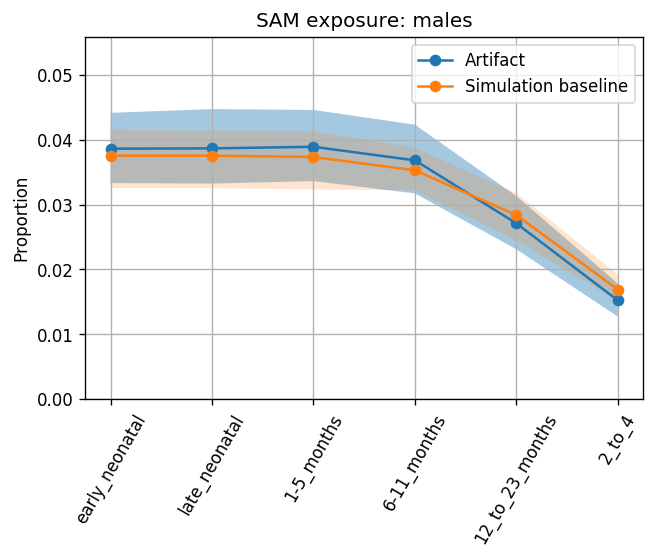

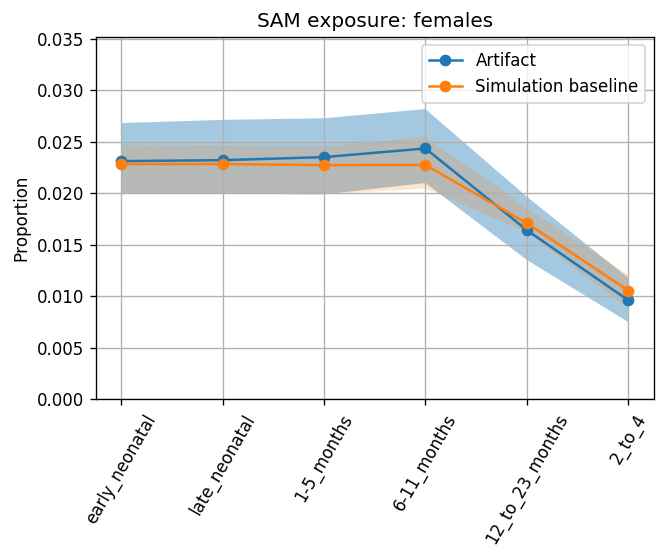

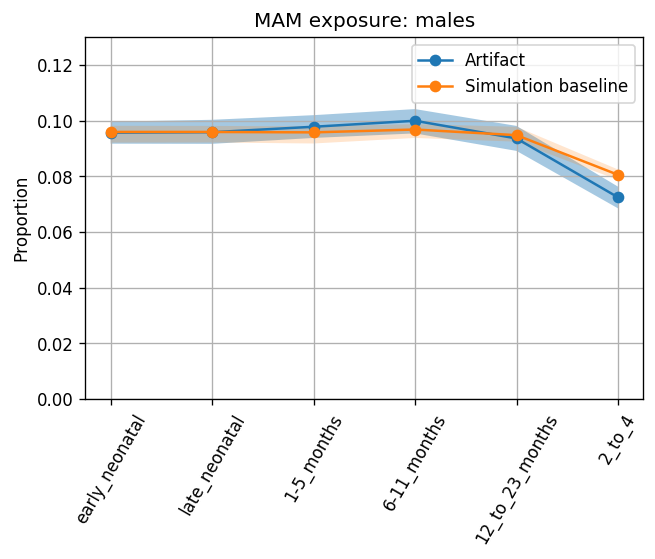

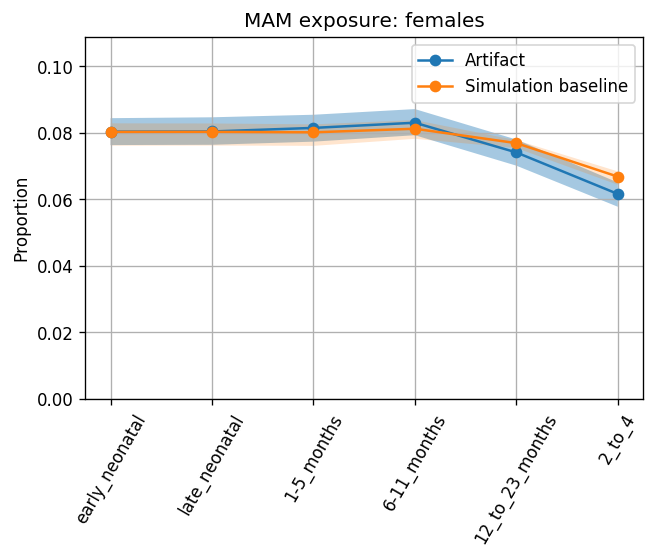

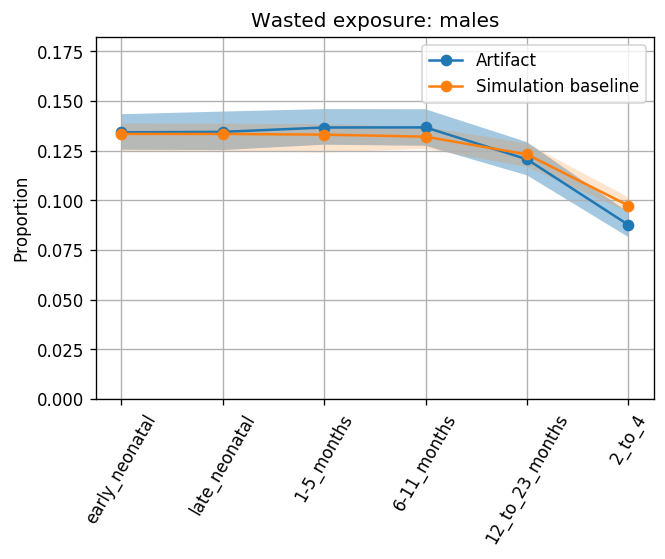

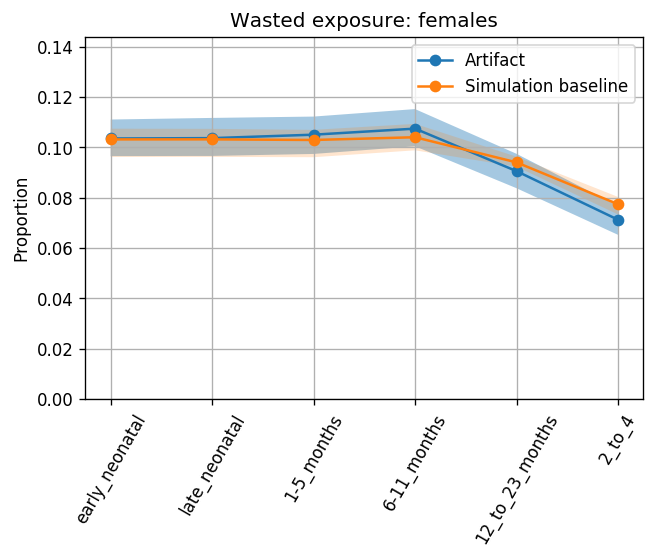

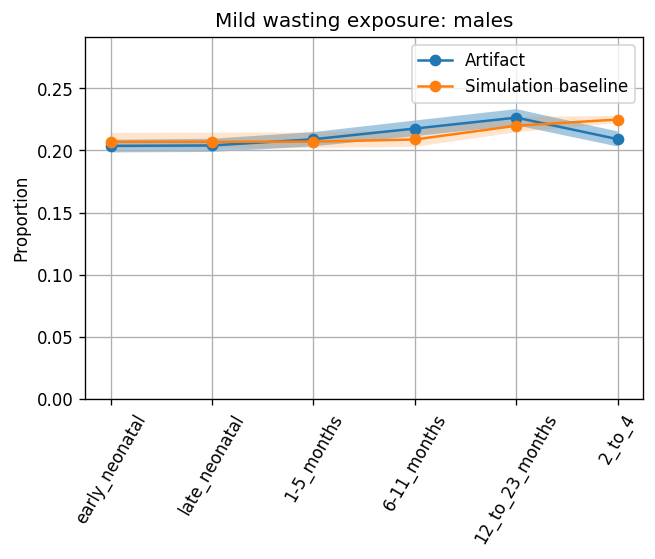

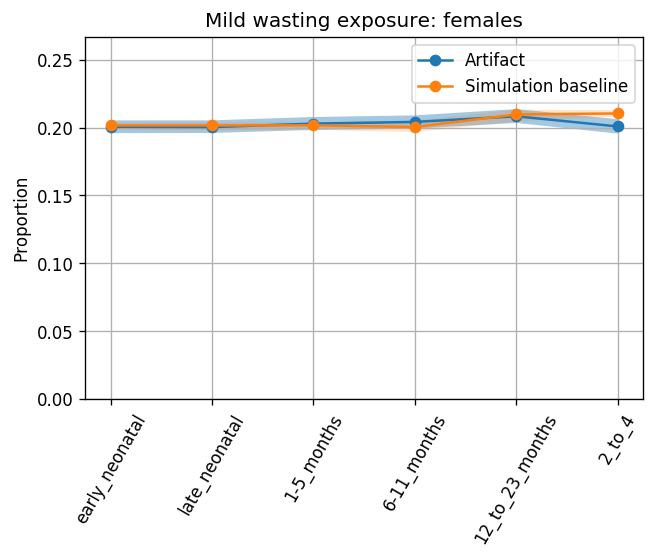

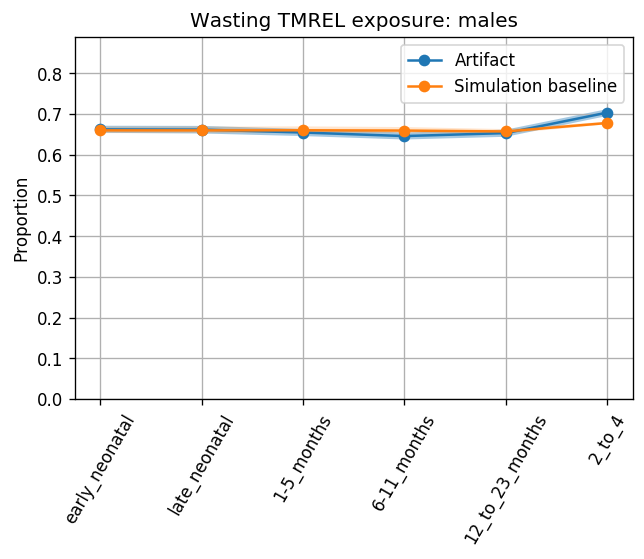

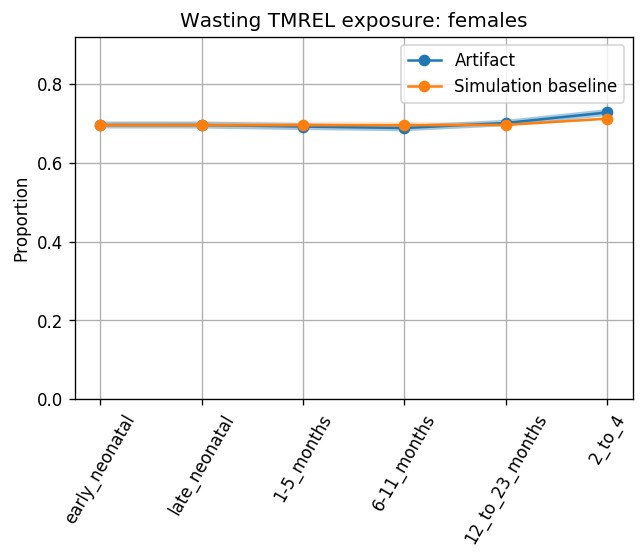

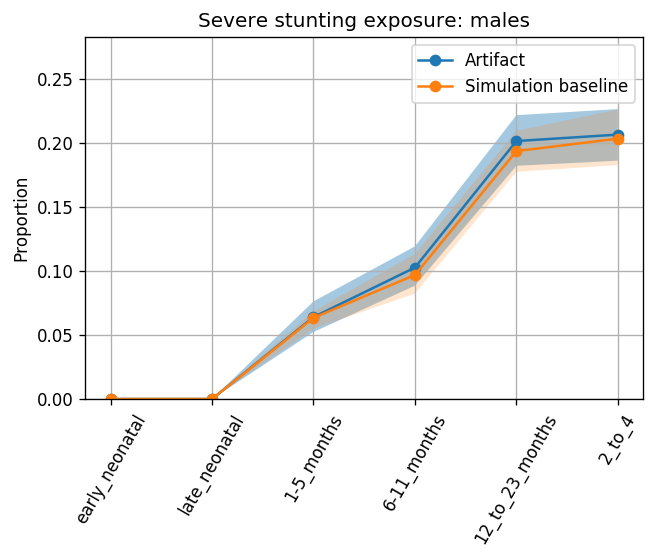

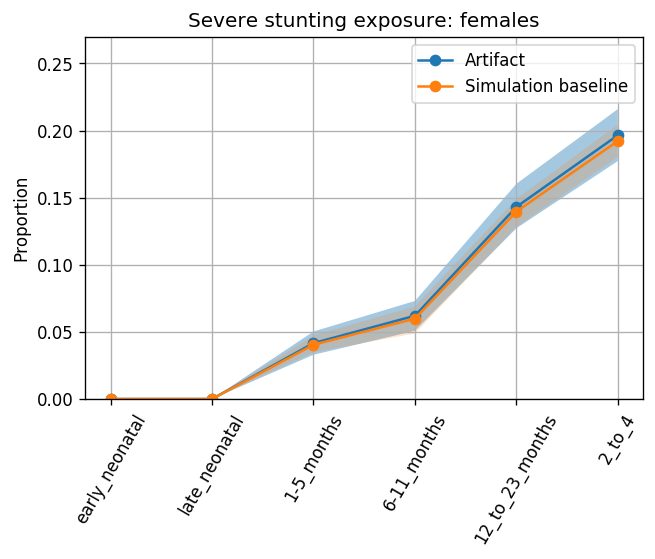

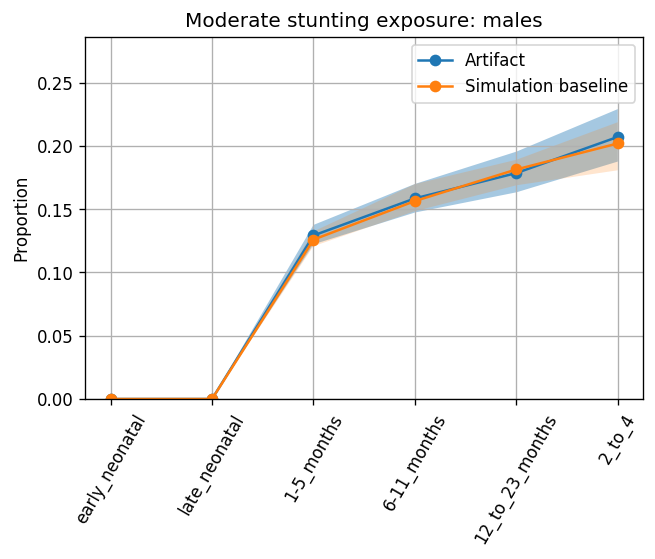

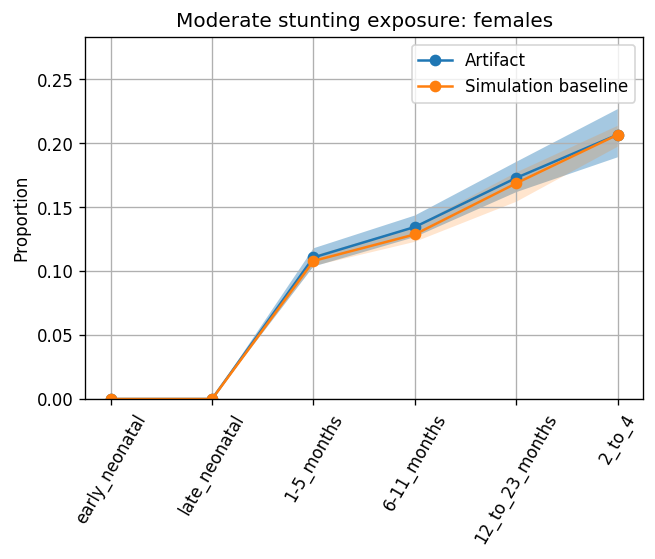

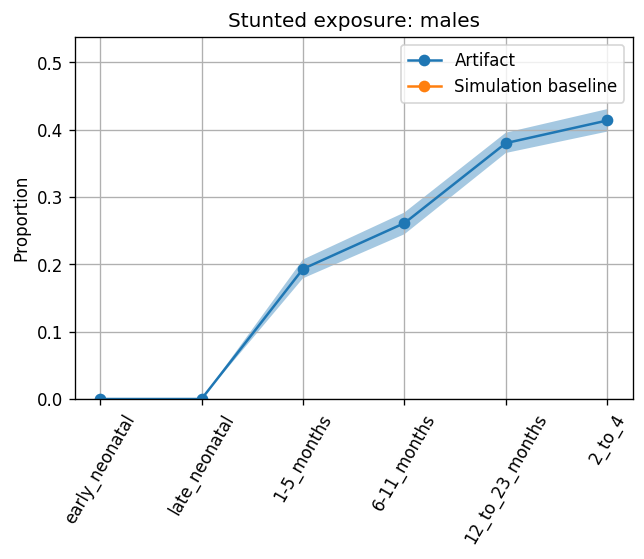

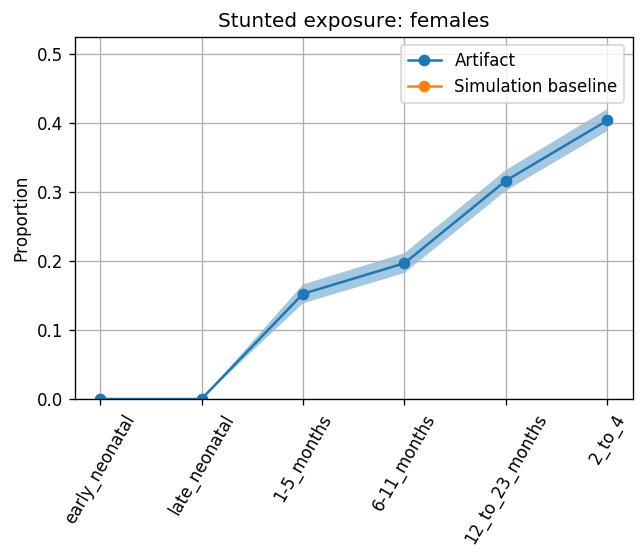

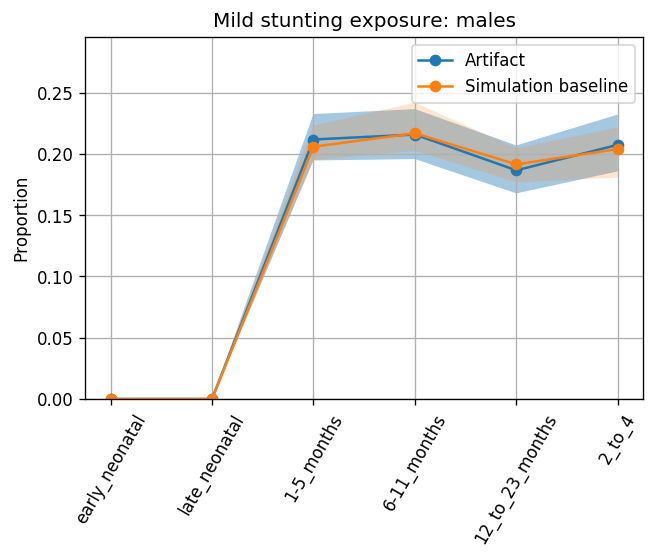

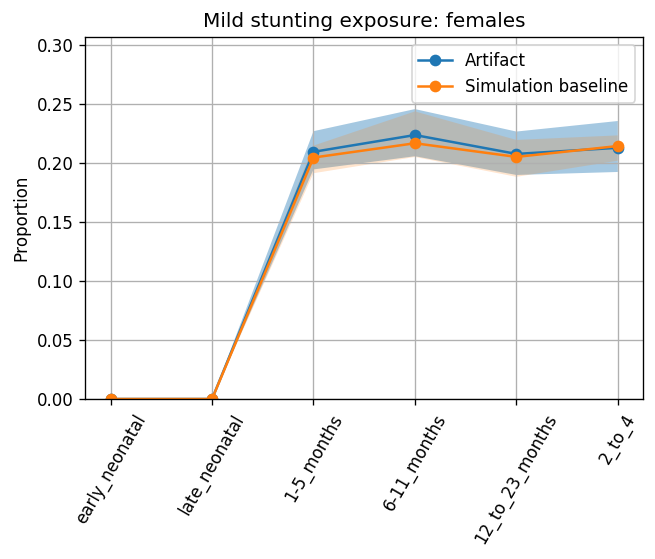

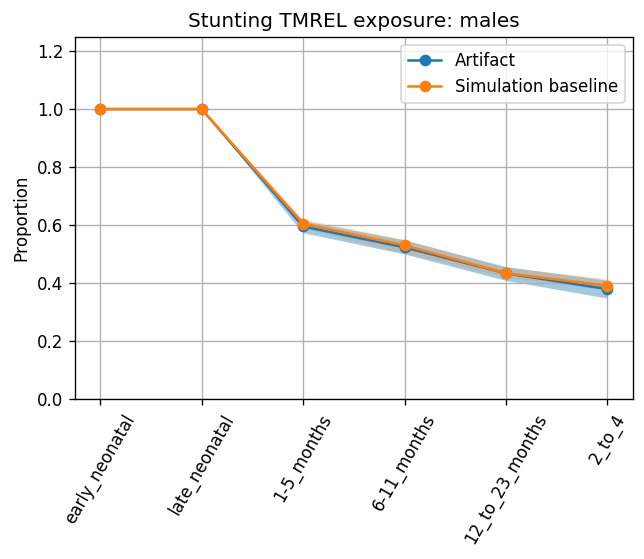

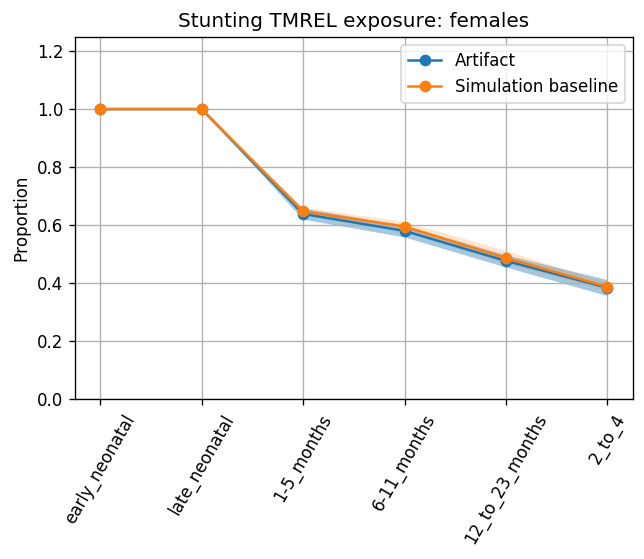

In [13]:
w_sim_cats = ['severe_acute_malnutrition','moderate_acute_malnutrition','wasted',
              'mild_child_wasting','susceptible_to_child_wasting']
art_cats = ['cat1','cat2','exposed','cat3','cat4']
w_title_cats = ['SAM','MAM','Wasted','Mild wasting','Wasting TMREL']
s_title_cats = ['Severe stunting','Moderate stunting','Stunted','Mild stunting','Stunting TMREL']

with PdfPages('model_4.0.1_cgf_exposure.pdf') as pdf:
    for i in list(range(0,len(art_cats))):
        for sex in ['male','female']:
            plot_cgf_exposure(wasting_prev, wasting_art, f'{sex}', art_cats[i],
                              w_sim_cats[i], w_title_cats[i])
            pdf.savefig(bbox_inches='tight')
    for i in list(range(0,len(art_cats))):
        for sex in ['male','female']:
            plot_cgf_exposure(stunting_prev, stunting_art, f'{sex}', 
                              art_cats[i], art_cats[i], s_title_cats[i])
            pdf.savefig(bbox_inches='tight')

# Cause model verification

In [14]:
def load_artifact_cause_data(measure, cause):
    data = art.load(f'cause.{cause}.{measure}')
    data = (data.apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1)
            .filter(['mean', '2.5%', '97.5%']).reset_index())
    data['age'] = 0
    data['age'] = np.where(data['age_start'] == 0, 'early_neonatal', #1
                                            np.where(data['age_end'] == 0.5, '1-5_months', #3
                                                     np.where(data['age_start'] == 0.5, '6-11_months', #4
                                                              np.where(data['age_start'] == 1, '12_to_23_months',  #5
                                                                       np.where(data['age_start'] == 2, '2_to_4',       #6
                                                                       'late_neonatal'))))) #2
    data['age_group'] = np.where(data['age'] == 'early_neonatal', 1,
                                   np.where(data['age'] == 'late_neonatal', 2,
                                            np.where(data['age'] == '1-5_months', 3, 
                                                     np.where(data['age'] == '6-11_months', 4, 
                                                              np.where(data['age'] == '12_to_23_months', 5,
                                    6)))))
    data['sex'] = np.where(data['sex'] == 'Female', 'female', 'male')
    data['measure'] = measure
    data['cause'] = cause
    return data

In [15]:
artifact_data = pd.DataFrame()
causes=['diarrheal_diseases','lower_respiratory_infections','protein_energy_malnutrition','measles']
measures=['prevalence','incidence_rate','remission_rate',
               'cause_specific_mortality_rate','excess_mortality_rate']
for cause in causes:    
    for measure in measures:
        try:
            temp = load_artifact_cause_data(measure, cause)
            artifact_data = pd.concat([artifact_data,temp], ignore_index=True)
        except:
            pass

artifact_data.head()

sex  age_start   age_end  year_start  year_end      mean      2.5%  \
0  female   0.000000  0.019178        2020      2021  0.021082  0.018352   
1  female   0.019178  0.076712        2020      2021  0.046737  0.039978   
2  female   0.076712  0.500000        2020      2021  0.045650  0.038413   
3  female   0.500000  1.000000        2020      2021  0.045650  0.038413   
4  female   1.000000  2.000000        2020      2021  0.026259  0.020612   

      97.5%              age  age_group     measure               cause  
0  0.023129   early_neonatal          1  prevalence  diarrheal_diseases  
1  0.054209    late_neonatal          2  prevalence  diarrheal_diseases  
2  0.053132       1-5_months          3  prevalence  diarrheal_diseases  
3  0.053132      6-11_months          4  prevalence  diarrheal_diseases  
4  0.033100  12_to_23_months          5  prevalence  diarrheal_diseases

In [16]:
groupby_cols = ['input_draw','sex','age']

In [17]:
state_pt = pd.read_csv(output_dir + 'disease_state_person_time.csv')
transitions = pd.read_csv(output_dir + 'disease_transition_count.csv')
deaths = pd.read_csv(output_dir + 'deaths.csv')
deaths.head()

Unnamed: 0     sex  year               cause measure  input_draw  scenario  \
0           0  female  2022  diarrheal_diseases   death          29  baseline   
1           1  female  2022  diarrheal_diseases   death          29  baseline   
2           2  female  2022  diarrheal_diseases   death          29  baseline   
3           3  female  2022  diarrheal_diseases   death          29  baseline   
4           4  female  2022  diarrheal_diseases   death          29  baseline   

   value                 wasting_state             age  
0   29.0  susceptible_to_child_wasting  early_neonatal  
1    6.0            mild_child_wasting  early_neonatal  
2    2.0   moderate_acute_malnutrition  early_neonatal  
3    0.0     severe_acute_malnutrition  early_neonatal  
4   81.0  susceptible_to_child_wasting   late_neonatal

In [19]:
def calculate_csmr():
    d = deaths.loc[deaths.scenario=='baseline']
    pem = d.loc[d.cause.str.contains('acute_malnutrition')]
    pem['cause'] = 'protein_energy_malnutrition'
    acmr = d.copy()
    acmr['cause'] = 'all_causes'
    d = pd.concat([d.loc[d.cause.isin(['diarrheal_diseases','lower_respiratory_infections','measles'])],
                  pem, acmr], ignore_index=True)
    d = d.groupby(groupby_cols + ['cause']).sum()
    pt = (state_pt.loc[state_pt.cause.str.contains('measles')]
          .loc[state_pt.scenario=='baseline'].groupby(groupby_cols).sum())
    d = ((d / pt)[['value']])
         #.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause'])
         #.describe(percentiles=[0.025,0.975]))
    return d

In [20]:
def calculate_transition_rates():
    trans = transitions.loc[transitions.scenario=='baseline']
    trans['cause'] = trans['measure'].str.split('to_', expand=True)[2].str.split('_event_count', expand=True)[0]
    trans['measure'] = np.where(trans.measure.str.contains('to_susceptible_to'),'remission','incidence')
    trans = trans.groupby(groupby_cols+['cause','measure']).sum()
    pt = (state_pt.loc[state_pt.cause.str.contains('measles')]
          .loc[state_pt.scenario=='baseline'].groupby(groupby_cols).sum())
    trans = (trans / pt)[['value']]
    trans = trans#.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
    return trans

In [21]:
def calculate_prevalence(causes):
    s = state_pt.copy()
    s = s.loc[s.scenario=='baseline']
    prev = pd.DataFrame()
    for cause in causes:
        infected = state_pt.loc[state_pt.cause==cause].groupby(groupby_cols + ['cause']).sum()
        total = state_pt.loc[state_pt.cause.str.contains(cause)].groupby(groupby_cols).sum()
        temp = (infected / total)[['value']]#.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
        prev = pd.concat([prev,temp])
    return prev

In [22]:
def calculate_child_growth_exposure_prevalence_by_draw(risk):
    state_pt = pd.read_csv(output_dir +f'{risk}_state_person_time.csv')
    state_pt = state_pt.loc[state_pt.scenario=='baseline']
    state_pt = state_pt.groupby(['input_draw','sex','age','cause']).sum()[['value']]
    prev = state_pt / state_pt.groupby(['input_draw','sex','age']).sum()
    #prev = prev.groupby(['sex','age','cause']).describe(percentiles=[0.025,0.975])
    return prev

In [23]:
csmr = calculate_csmr()
trans = calculate_transition_rates()
prev = calculate_prevalence(['diarrheal_diseases','measles','lower_respiratory_infections'])
pem_prev = calculate_child_growth_exposure_prevalence_by_draw('wasting').reset_index()
pem_prev = (pem_prev.loc[pem_prev.cause.str.contains('acute_malnutrition')]
            .groupby(['input_draw','sex','age']).sum().reset_index())
pem_prev['cause'] = 'protein_energy_malnutrition'
prev = pd.concat([prev.reset_index(), pem_prev], ignore_index=True).set_index(groupby_cols + ['cause'])
remission = trans / prev
emr = csmr / prev

prev=prev.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
trans=trans.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
remission=remission.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause','measure']).describe(percentiles=[0.025,0.975])
emr=emr.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])
csmr=csmr.groupby([c for c in groupby_cols if c != 'input_draw'] + ['cause']).describe(percentiles=[0.025,0.975])

/ihme/homes/alibow/.conda/envs/vivarium_conic_lsff/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/ihme/homes/alibow/.conda/envs/vivarium_conic_lsff/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/ihme/homes/alibow/.conda/envs/vivarium_conic_lsff/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting b

In [24]:
def plot_cause_data(measure, cause, sex):
    
    a = artifact_data.loc[artifact_data.sex==sex].loc[artifact_data.measure==measure].loc[artifact_data.cause==cause]
    assert len(a)>0
    plt.figure(dpi=120)
    plt.plot(a['age'], a['mean'], marker='o', label='Artifact data')
    plt.fill_between(a['age'], a['2.5%'], a['97.5%'], alpha=0.2)
    
    if measure=='cause_specific_mortality_rate':
        sim_data = csmr.copy()
    elif measure=='prevalence':
        sim_data=prev.copy()
    elif measure=='incidence_rate':
        sim_data=trans.reset_index().loc[trans.reset_index().measure=='incidence']
    elif measure=='remission_rate':
        sim_data=remission.reset_index().loc[remission.reset_index().measure=='remission']
    elif measure=='excess_mortality_rate':
        sim_data = emr.copy()
    s = sim_data.reset_index()
    s['order'] = np.where(s.age=='early_neonatal', 0,
                     np.where(s.age=='late_neonatal', 1,
                             np.where(s.age=='1-5_months',2,
                                     np.where(s.age=='6-11_months',3,
                                             np.where(s.age=='12_to_23_months',4,5)))))
    s = s.sort_values(by=['order'])
    s = s.loc[s.sex==f'{sex}'].loc[s.cause==cause]
    plt.plot(s['age'], s['value','mean'], marker='o', label=f'Simulation baseline')
    plt.fill_between(s['age'], s['value','2.5%'], s['value','97.5%'], alpha=0.2)
    plt.grid()
    plt.xticks(rotation=60)
    plt.legend()
    cause_title = cause.replace('_',' ').capitalize()
    measure_title = measure.replace('_',' ')
    plt.title(f'{cause_title} {measure_title}\n{sex.capitalize()}s')

/ihme/homes/alibow/.conda/envs/vivarium_conic_lsff/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/ihme/homes/alibow/.conda/envs/vivarium_conic_lsff/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/ihme/homes/alibow/.conda/envs/vivarium_conic_lsff/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retai

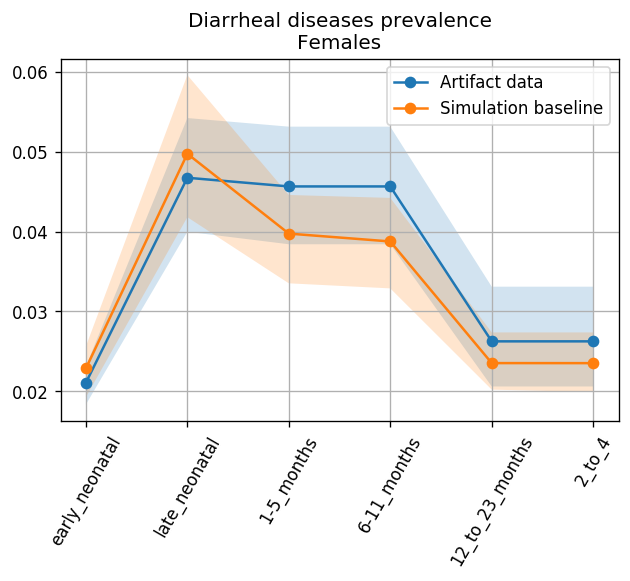

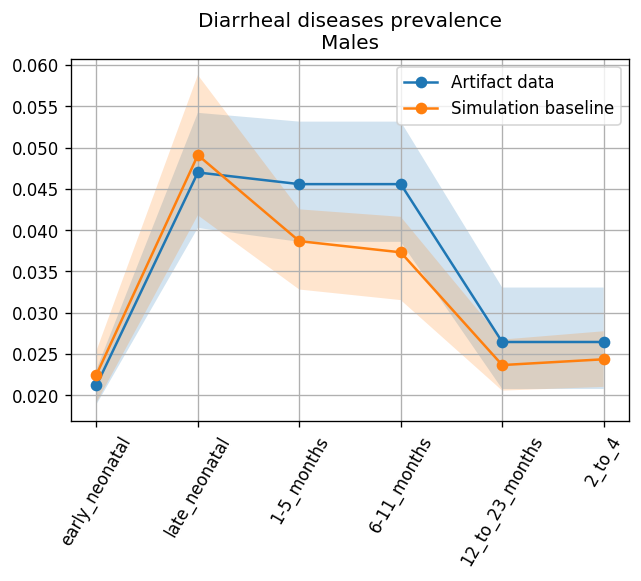

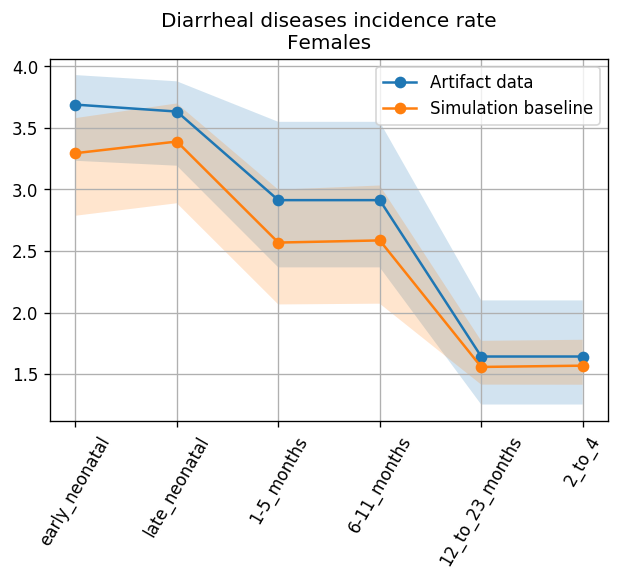

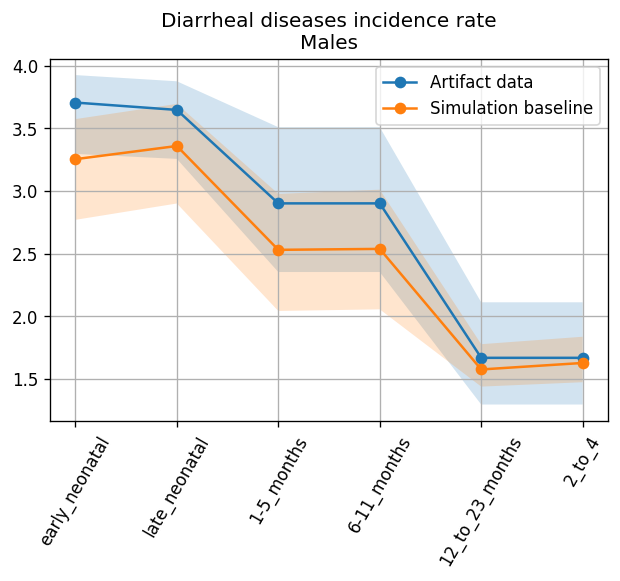

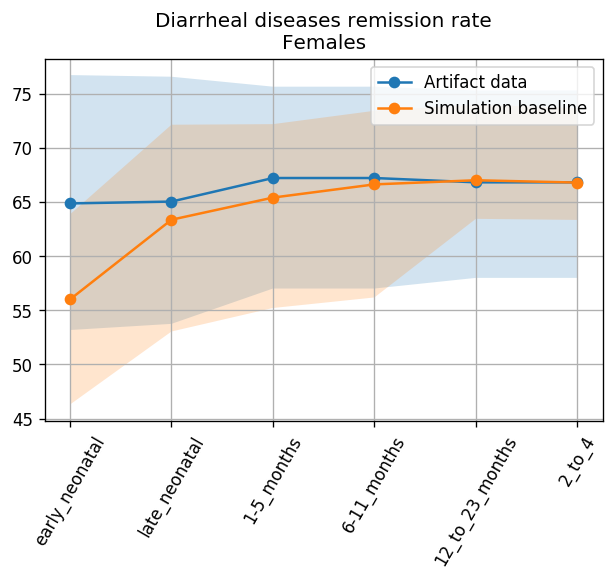

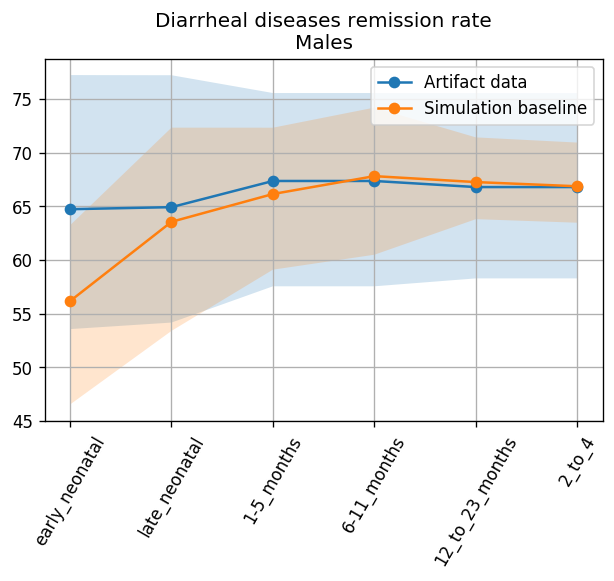

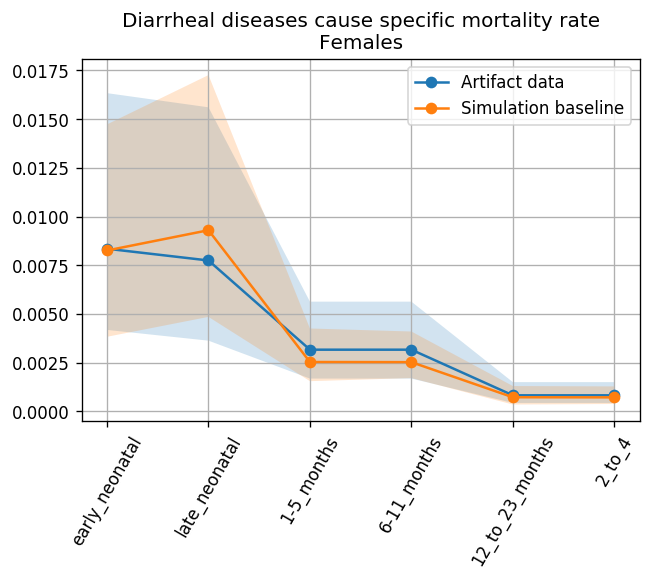

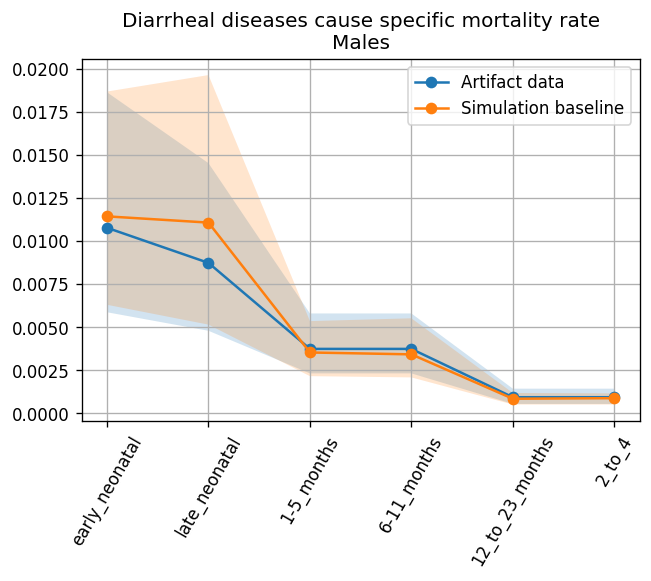

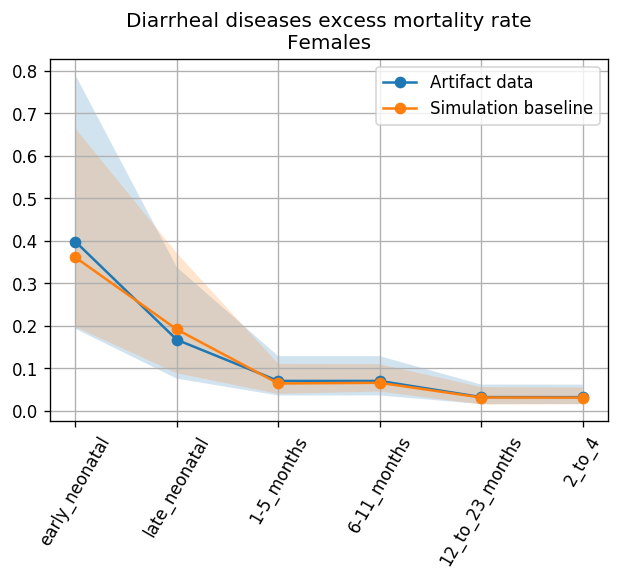

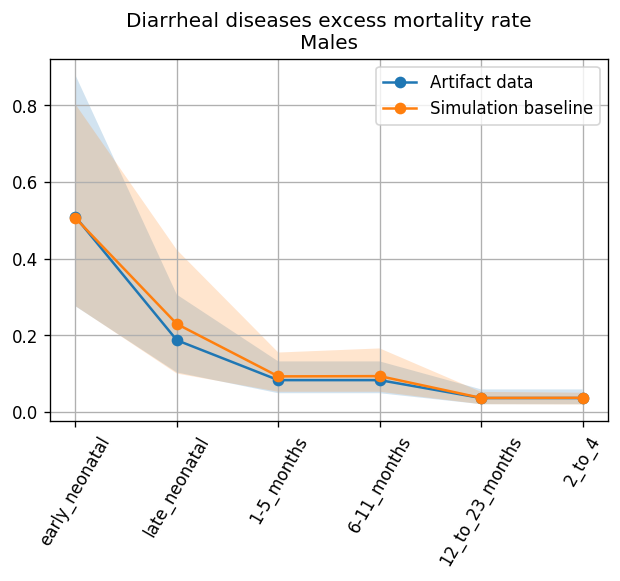

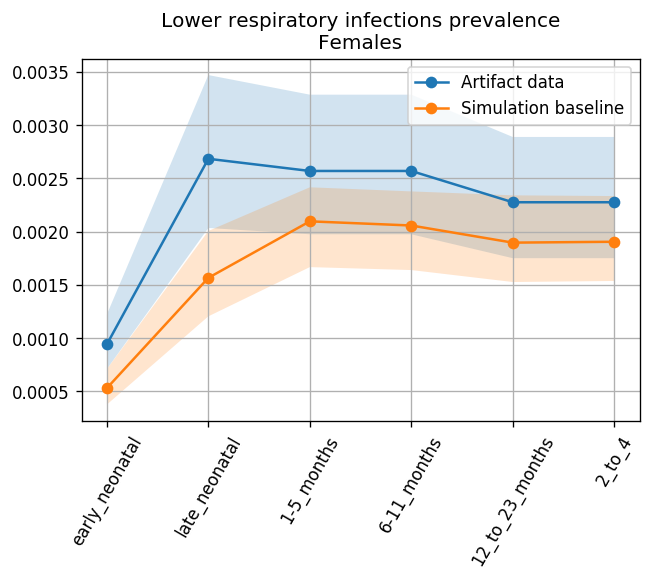

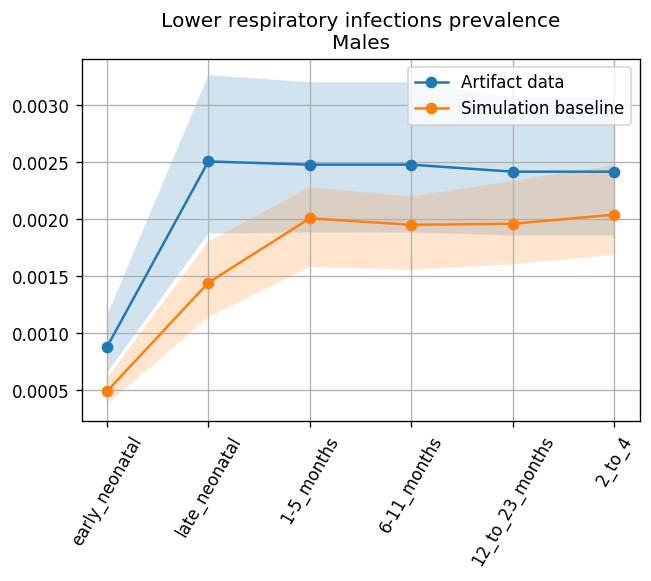

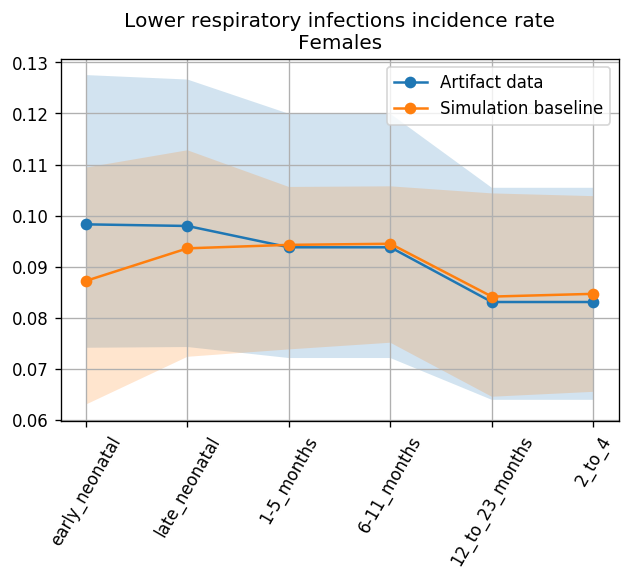

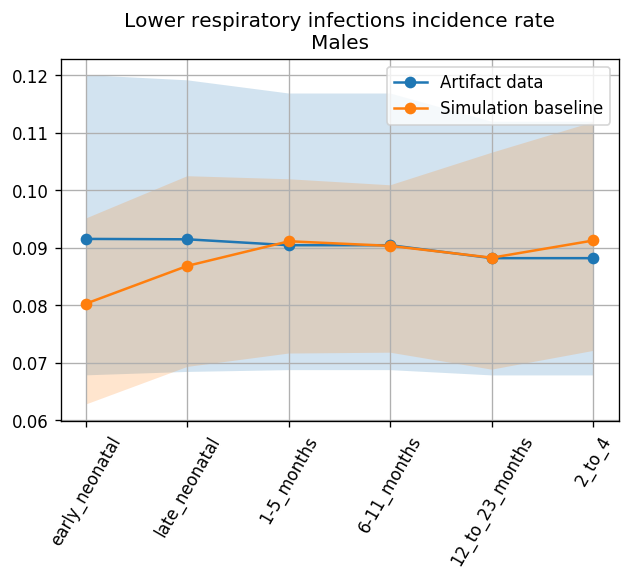

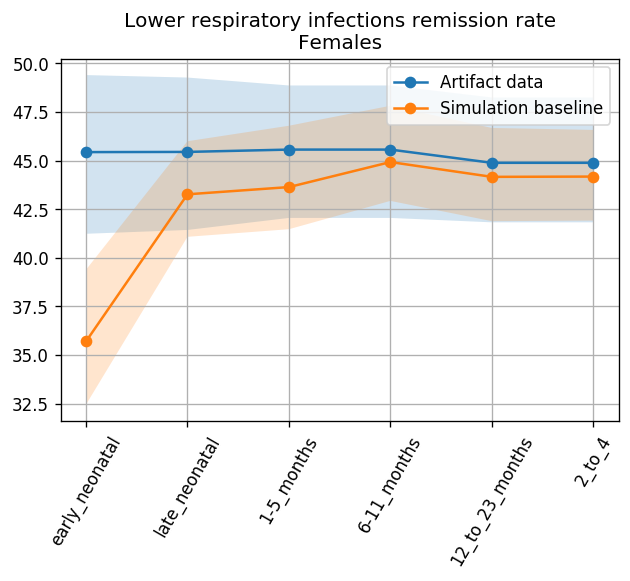

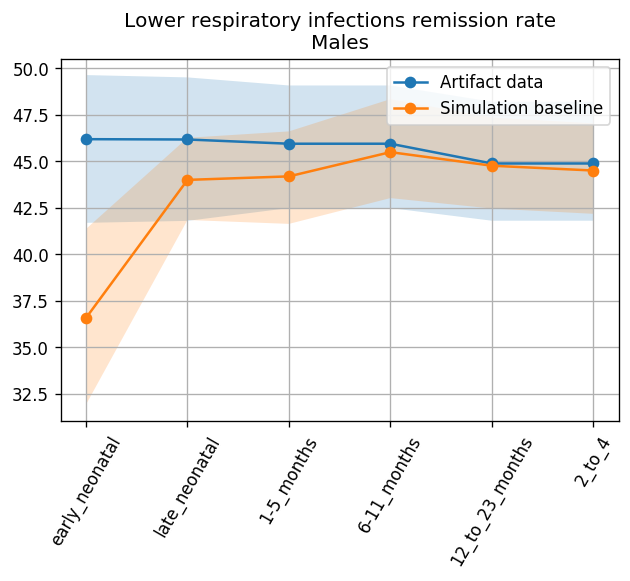

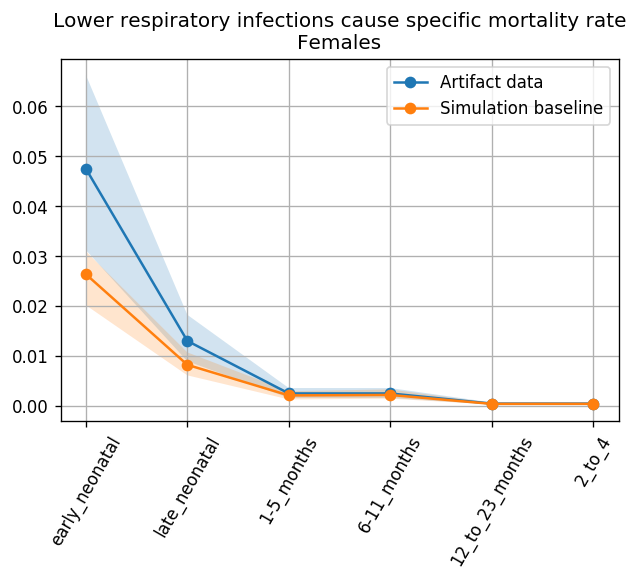

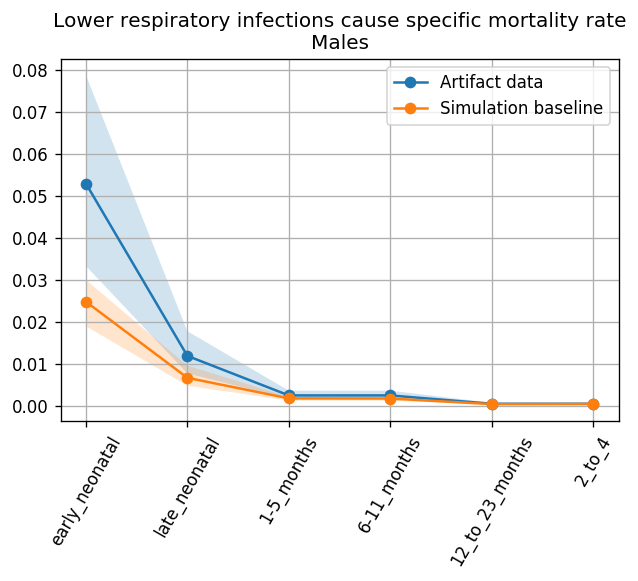

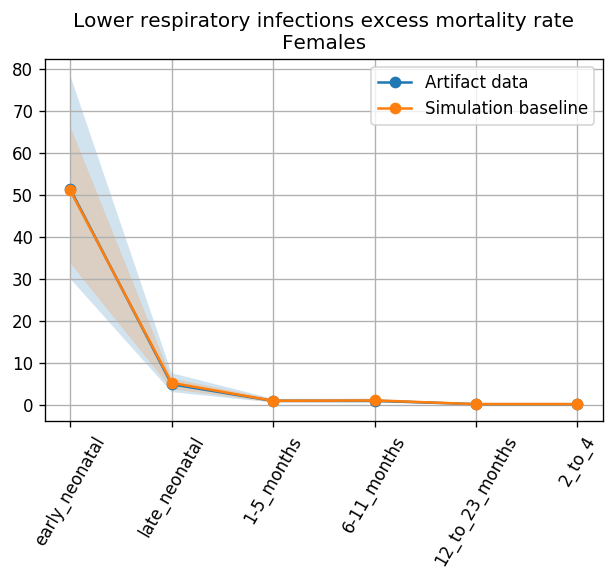

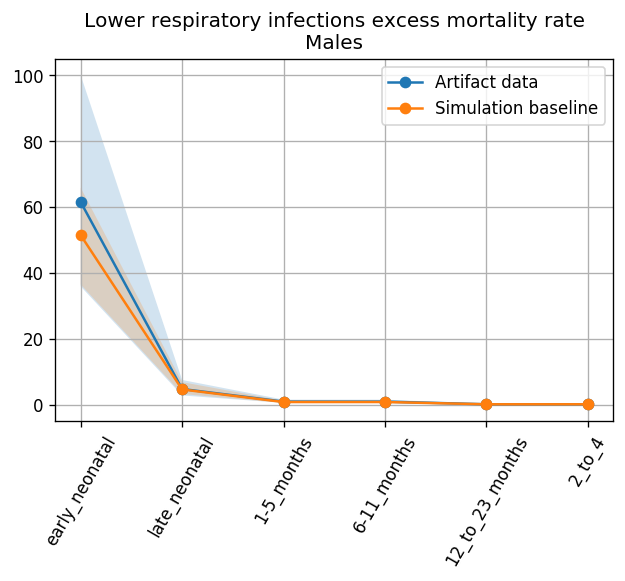

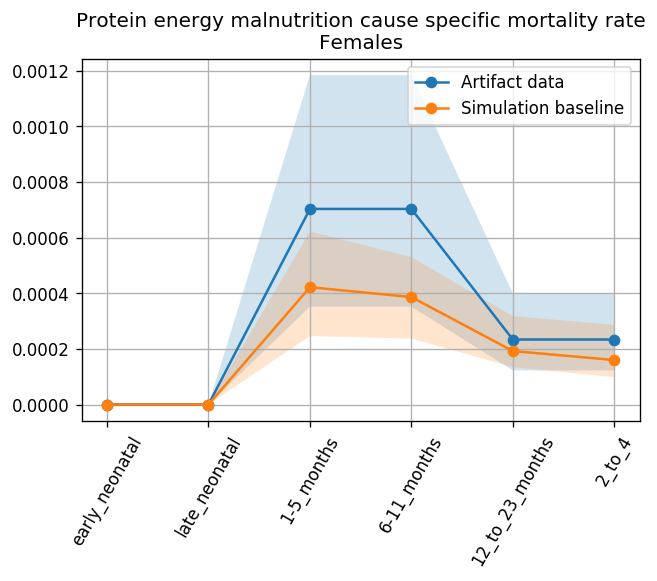

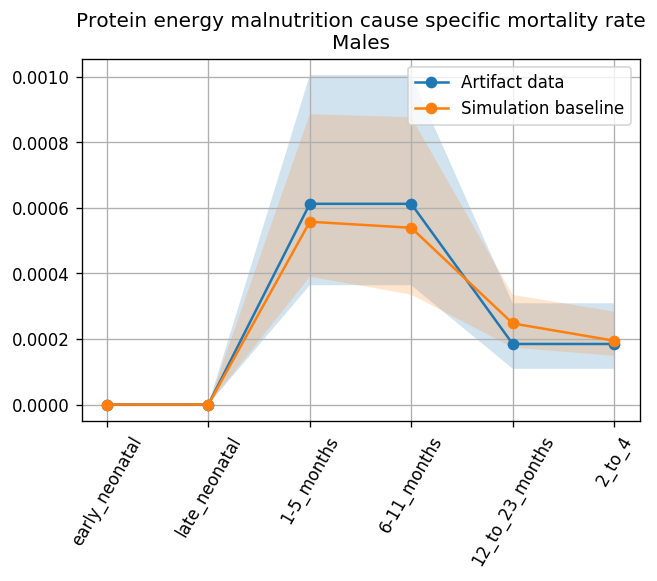

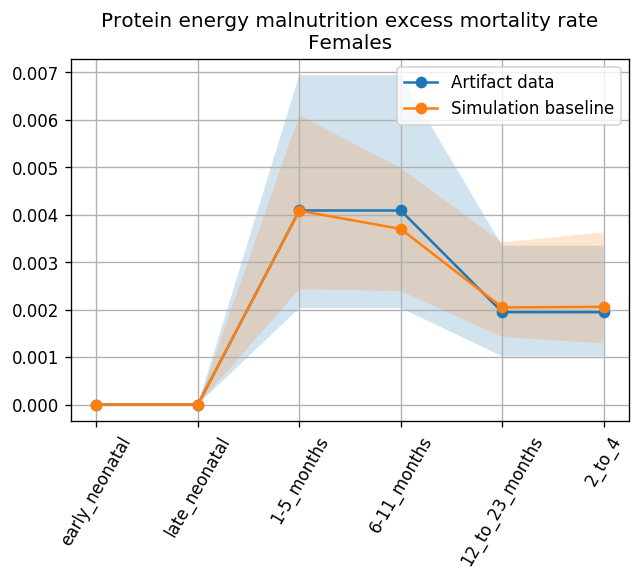

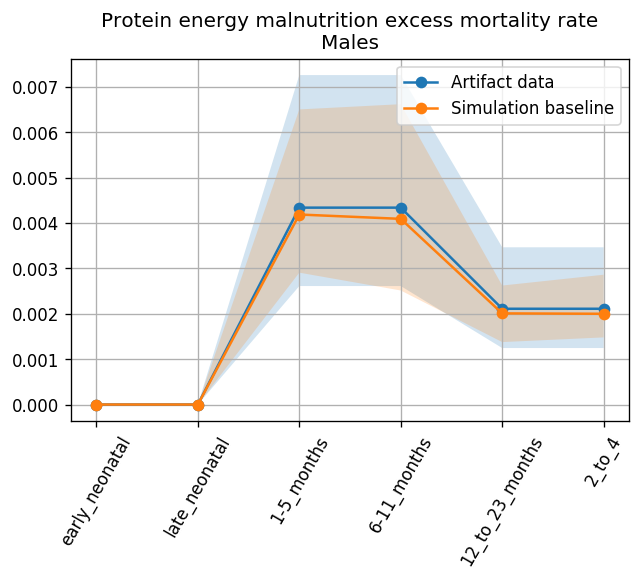

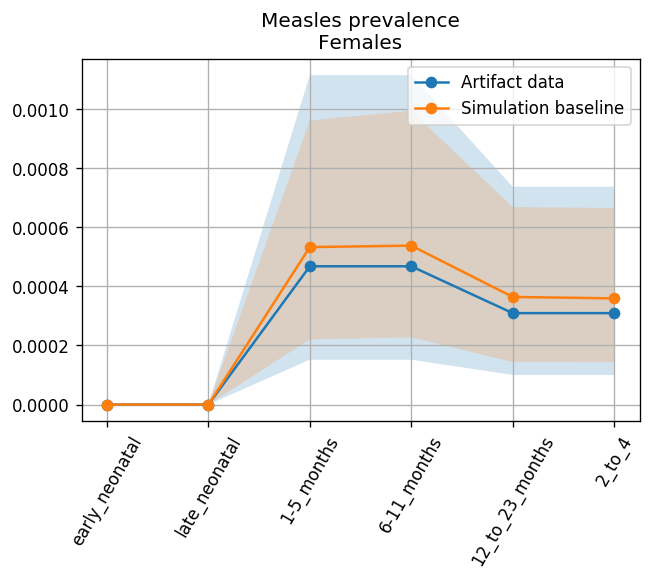

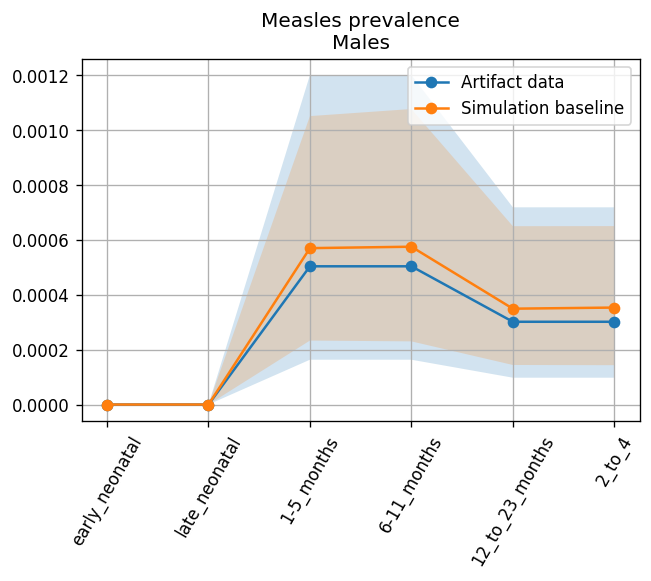

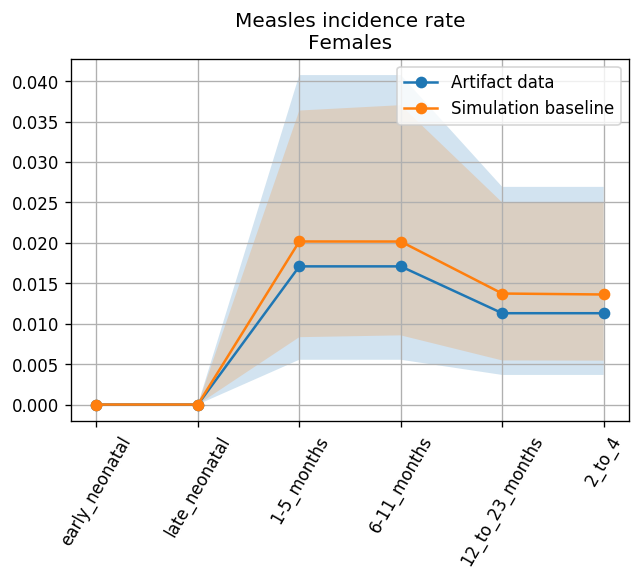

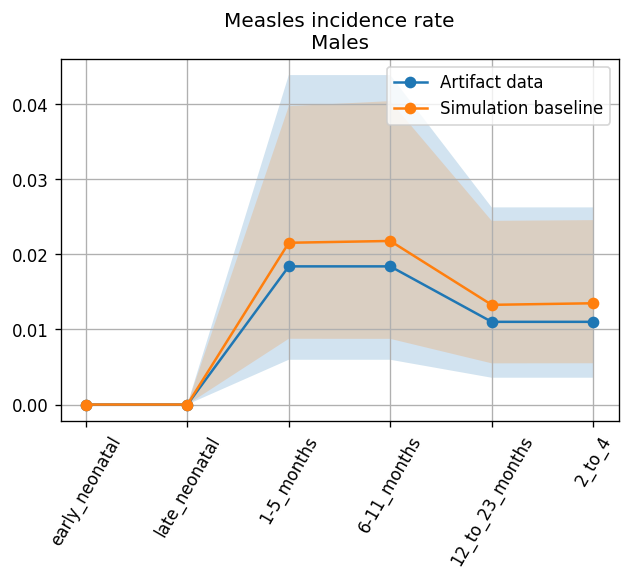

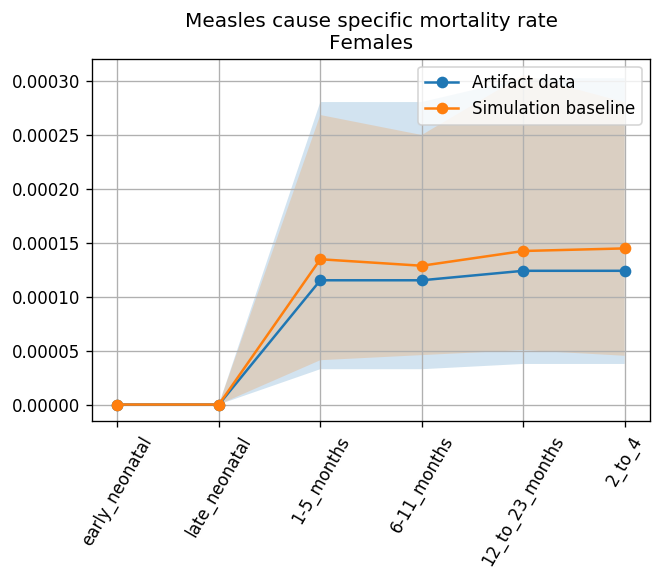

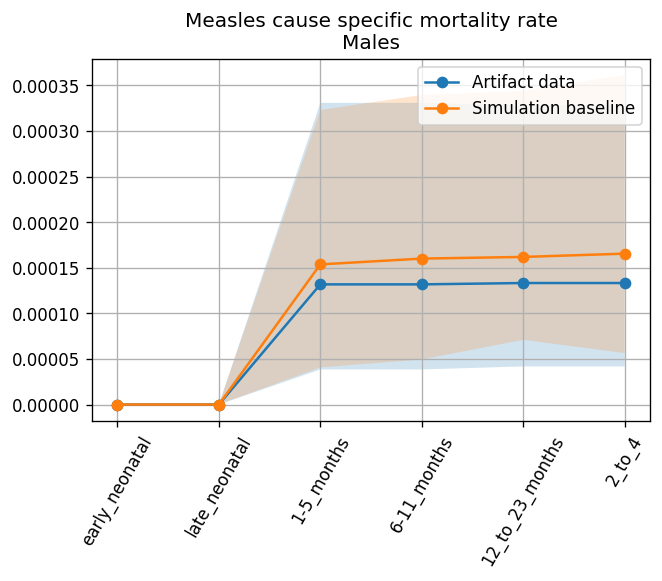

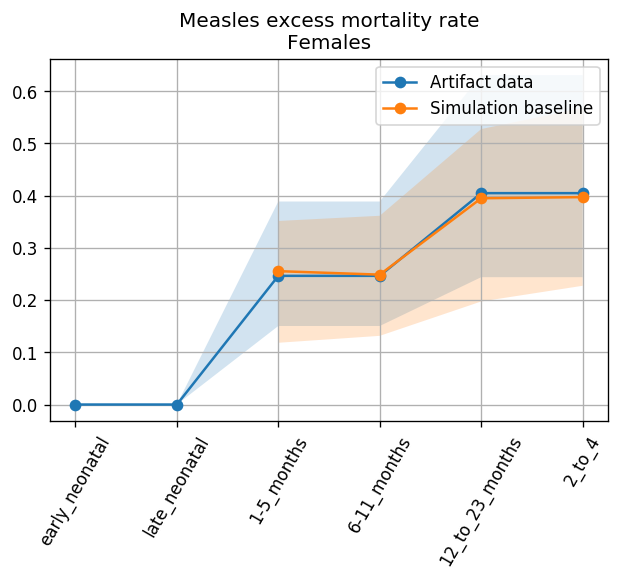

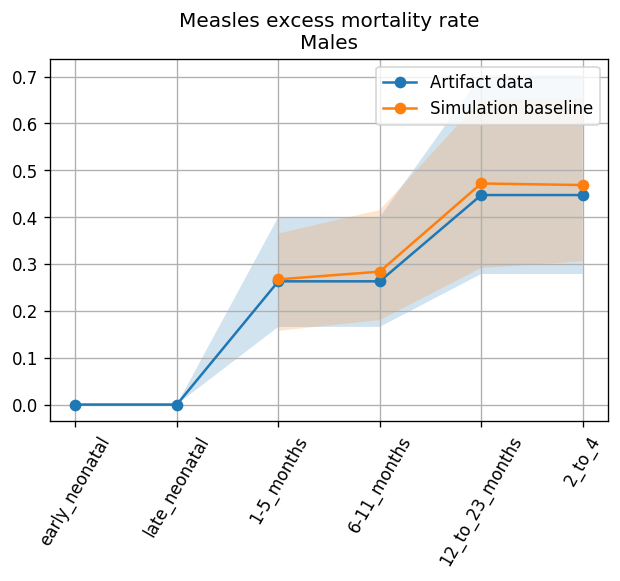

In [25]:
with PdfPages('model_4.0.1_cause_verification.pdf') as pdf:
    causes=['diarrheal_diseases','lower_respiratory_infections','protein_energy_malnutrition','measles']
    measures=['prevalence','incidence_rate','remission_rate',
                   'cause_specific_mortality_rate','excess_mortality_rate']
    for cause in causes:
        for measure in measures:
            for sex in ['female','male']:
                try:
                    plot_cause_data(measure, cause, sex)
                    pdf.savefig(bbox_inches='tight')
                except:
                    pass

# Measles by year

In [26]:
groupby_cols = ['input_draw', 'sex', 'age','year']
csmr = calculate_csmr().groupby([c for c in groupby_cols if c != 'input_draw']+['cause']).describe(percentiles=[0.025,0.975]).reset_index()
prev = (calculate_prevalence(['diarrheal_diseases','measles','lower_respiratory_infections'])
        .groupby([c for c in groupby_cols if c != 'input_draw']+['cause']).describe(percentiles=[0.025,0.975]).reset_index())
trans = calculate_transition_rates().groupby([c for c in groupby_cols if c != 'input_draw']+['cause','measure']).describe(percentiles=[0.025,0.975]).reset_index()
csmr.head()

/ihme/homes/alibow/.conda/envs/vivarium_conic_lsff/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/ihme/homes/alibow/.conda/envs/vivarium_conic_lsff/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


sex         age  year                         cause value            \
                                                          count      mean   
0  female  1-5_months  2022                    all_causes  12.0  0.011964   
1  female  1-5_months  2022            diarrheal_diseases  12.0  0.002599   
2  female  1-5_months  2022  lower_respiratory_infections  12.0  0.002104   
3  female  1-5_months  2022                       measles  12.0  0.000149   
4  female  1-5_months  2022   protein_energy_malnutrition  12.0  0.000447   

                                                               
        std       min      2.5%       50%     97.5%       max  
0  0.001650  0.008426  0.009011  0.012069  0.014266  0.014368  
1  0.000922  0.001366  0.001412  0.002501  0.004478  0.004956  
2  0.000636  0.001178  0.001229  0.002052  0.003111  0.003226  
3  0.000106  0.000000  0.000006  0.000160  0.000324  0.000343  
4  0.000166  0.000226  0.000227  0.000446  0.000708  0.000732

In [27]:
def plot_measures_by_year(cause, sex, age, measure):
    
    if measure=='cause_specific_mortality_rate':
        sim_data = csmr.copy()
    elif measure=='prevalence':
        sim_data=prev.copy()
    elif measure=='incidence_rate':
        sim_data=trans.reset_index().loc[trans.reset_index().measure=='incidence']
    elif measure=='remission_rate':
        sim_data=remission.reset_index().loc[remission.reset_index().measure=='remission']
    elif measure=='excess_mortality_rate':
        sim_data = emr.copy()
    plt.figure()
    p = (sim_data.loc[sim_data.cause==cause]
         .loc[sim_data.sex==sex]
         .loc[sim_data.age==age])
    a = (artifact_data.loc[artifact_data.measure==measure]
        .loc[artifact_data.cause==cause]
        .loc[artifact_data.sex==sex]
        .loc[artifact_data.age==age])
    plt.plot(p.year, list(a['mean']) * len(p.year), marker='o', label='Artifact data')
    plt.fill_between(p.year, list(a['2.5%']) * len(p.year), 
                     list(a['97.5%']) * len(p.year), alpha=0.25)

    plt.plot(p.year, p['value','mean'], marker='o', label='Simulation baseline')
    plt.fill_between(p.year, p['value','2.5%'], p['value','97.5%'], alpha=0.25)

    plt.legend()
    plt.xticks(p.year)
    plt.title(f'{cause} {measure}\n{sex}s {age}')

/ihme/homes/alibow/.conda/envs/vivarium_conic_lsff/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/ihme/homes/alibow/.conda/envs/vivarium_conic_lsff/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]
/ihme/homes/alibow/.conda/envs/vivarium_conic_lsff/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotli

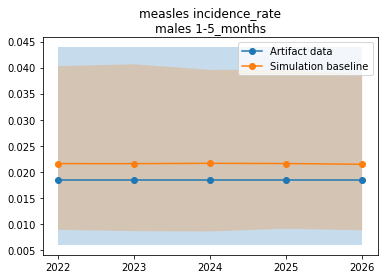

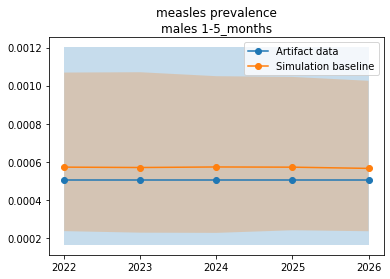

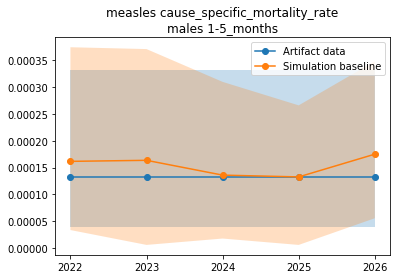

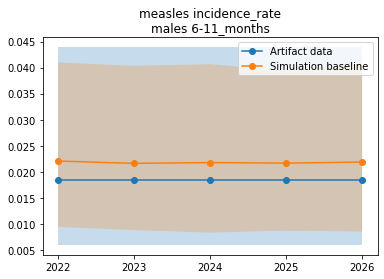

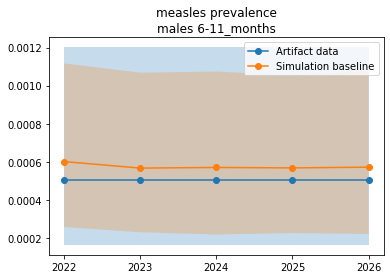

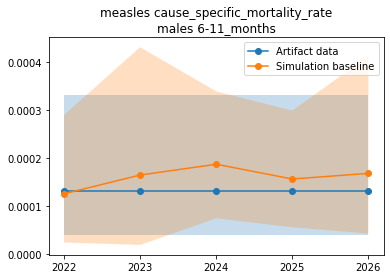

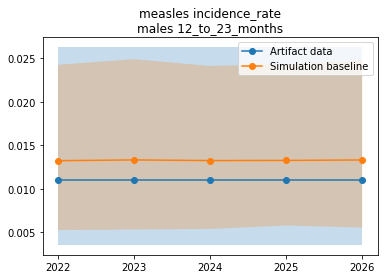

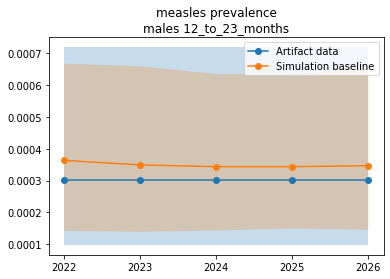

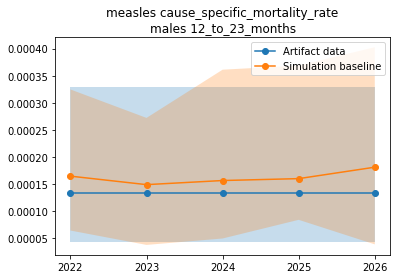

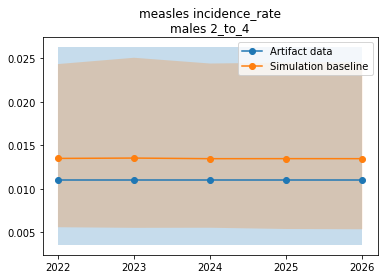

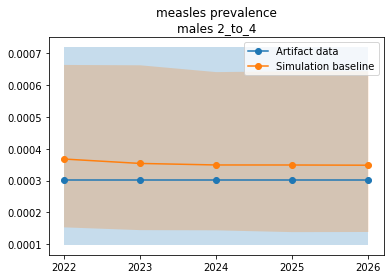

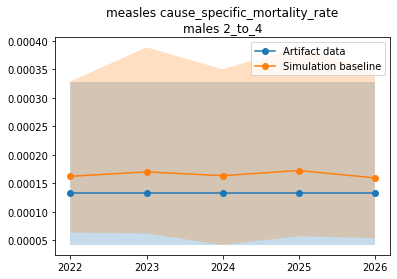

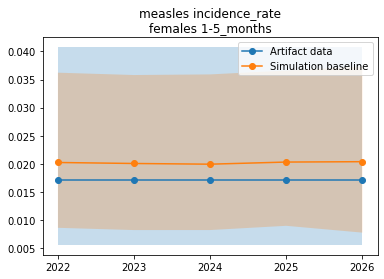

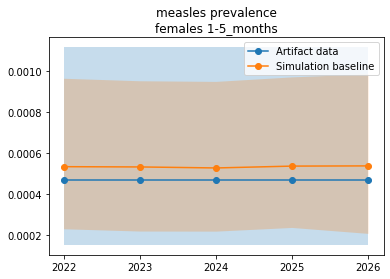

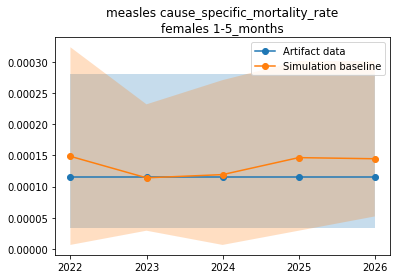

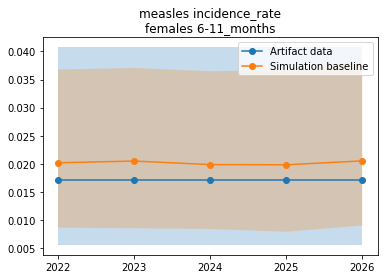

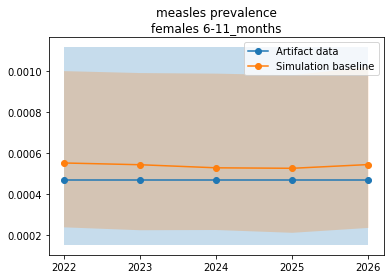

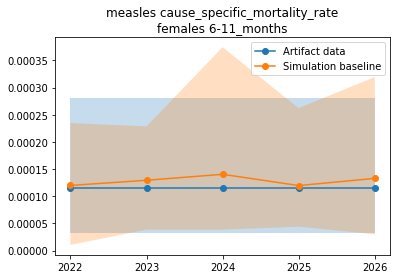

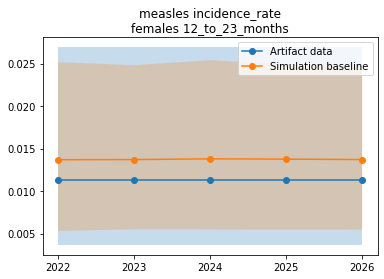

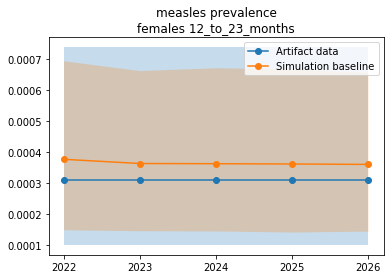

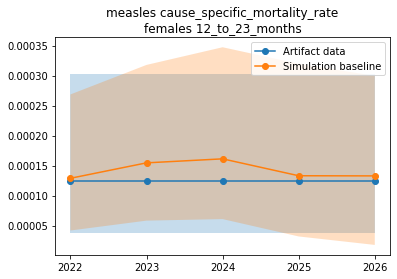

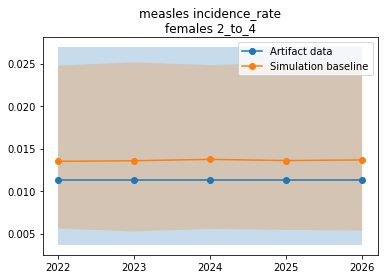

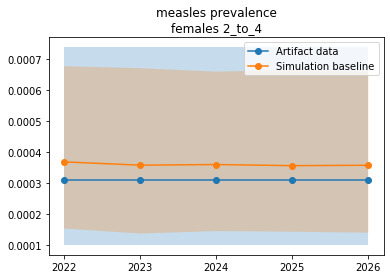

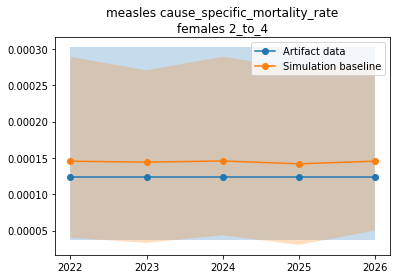

In [28]:
with PdfPages('measles_by_year_model_4.0.1.pdf') as pdf:

    for sex in ['male','female']:
        for age in ['1-5_months', '6-11_months',
           '12_to_23_months', '2_to_4']:
            for measure in ['incidence_rate','prevalence','cause_specific_mortality_rate']:
                plot_measures_by_year(cause, sex, age, measure)
                pdf.savefig(bbox_inches='tight')